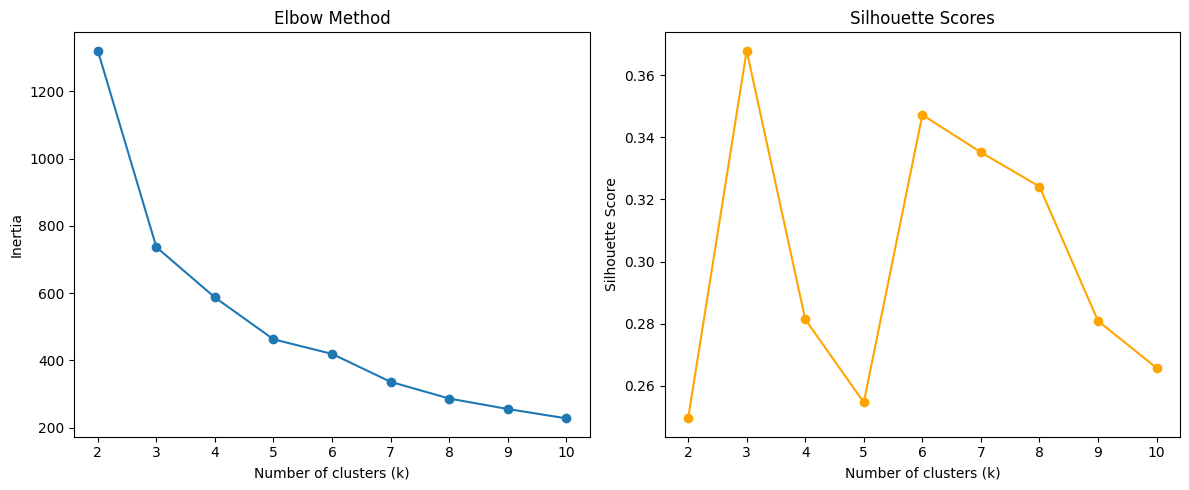

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_score

# Load data
df = pd.read_csv('/Users/mukki11/Documents/UberChatbot/Data_Generation/driver_cancellations.csv')
X = df[['rider_rating', 'wait_time']].dropna()

# Elbow and Silhouette
inertias = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('kmeans', KMeans(n_clusters=k, random_state=42))
    ])
    
    cluster_labels = pipeline.fit_predict(X)
    inertias.append(pipeline.named_steps['kmeans'].inertia_)
    silhouette_scores.append(silhouette_score(X, cluster_labels))

# Plot
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Elbow Plot
ax[0].plot(k_range, inertias, marker='o')
ax[0].set_title('Elbow Method')
ax[0].set_xlabel('Number of clusters (k)')
ax[0].set_ylabel('Inertia')

# Silhouette Score Plot
ax[1].plot(k_range, silhouette_scores, marker='o', color='orange')
ax[1].set_title('Silhouette Scores')
ax[1].set_xlabel('Number of clusters (k)')
ax[1].set_ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

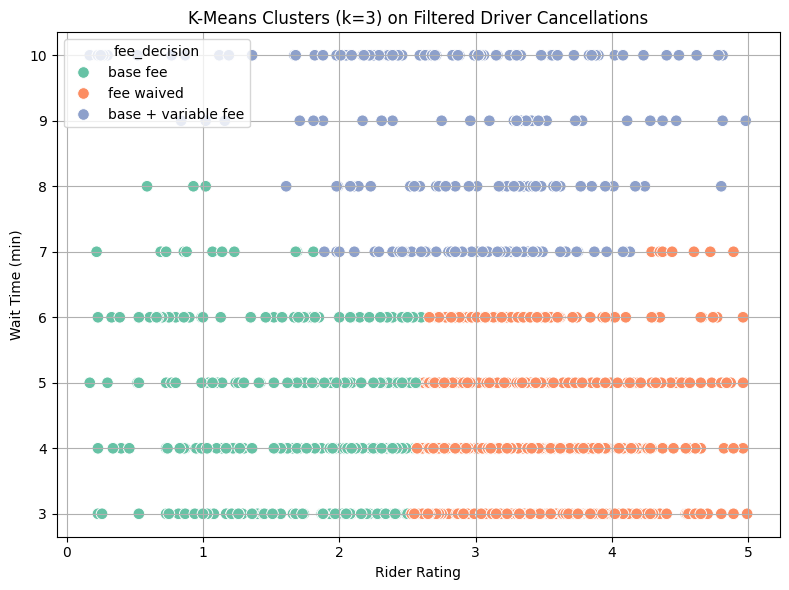

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('/Users/mukki11/Documents/UberChatbot/Data_Generation/driver_cancellations.csv')

# Features
X = df[['rider_rating', 'wait_time']]

# Build and fit pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(n_clusters=3, random_state=42))
])

df['cluster'] = pipeline.fit_predict(X)

# Map cluster labels to fee categories
cluster_label_map = {
    0: "fee waived",
    1: "base fee",
    2: "base + variable fee"
}

df['fee_decision'] = df['cluster'].map(cluster_label_map)

# Plot the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x='rider_rating',
    y='wait_time',
    hue='fee_decision',
    palette='Set2',
    s=70
)
plt.title('K-Means Clusters (k=3) on Filtered Driver Cancellations')
plt.xlabel('Rider Rating')
plt.ylabel('Wait Time (min)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [27]:
# Save pipeline
import joblib
joblib.dump(pipeline, 'driver_cancels.pkl')

['driver_cancels.pkl']